In [124]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import datetime as dt
# suppress warning
import warnings
warnings.filterwarnings('ignore')

#Clear the Charging stations data

In [125]:
data2 = pd.read_csv('Electric_Vehicle_Charging_Stations_in_New_York_20240220.csv')

In [126]:
data = pd.read_csv('NYC_EV_Fleet_Station_Network_20240220.csv')

In [127]:
data.head()

,STATION NAME,AGENCY,NO. OF PLUGS,TYPE OF CHARGER,ADDRESS,CITY,POSTCODE,BOROUGH,LATITUDE,LONGITUDE,COMMUNITY DISTRICT,COUNCIL DISTRICT,CENSUS TRACT 2020,BIN,BBL,NEIGHBORHOOD TABULATION AREA (NTA) (2020)
0,NYC FLEET / ACS_LINDEN_1_L3,ACS,1,Level 3 Fast Charger,2554 Linden Blvd,East New York,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
1,NYC FLEET / ACS_LINDEN_2_L3,ACS,1,Level 3 Fast Charger,2554 Linden Blvd,East New York,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
2,NYC FLEET / ACS_LINDEN-1,ACS,1,Level 2 Charger,2554 Linden Blvd,Brooklyn,11208.0,Brooklyn,40.668034,-73.869949,305.0,42.0,1220.0,3098733.0,3.044840e+09,BK0505
3,NYC FLEET / ACSSTMARKSPL1,ACS,1,Level 2 Charger,350 St Marks Pl,Staten Island,10301.0,Staten Island,40.640708,-74.077697,501.0,49.0,3.0,5000185.0,5.000160e+09,SI0101
4,NYC FLEET / CITYHALL EAST,CITYHALL,2,Level 2 Charger,New York City Hall,New York,10007.0,Manhattan,40.712806,-74.006096,101.0,1.0,31.0,1079147.0,1.001220e+09,MN0102


In [128]:
data2.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,42.910944,-77.746320,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,04/01/2019,J1772
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,43.118929,-77.556073,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,01/23/2020,J1772
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,42.681427,-73.768380,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,08/26/2020,J1772
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,42.650590,-73.749073,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,05/02/2019,J1772
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,40.657441,-73.874619,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,09/24/2021,J1772


In [129]:
data2['Open Date'] =pd.to_datetime(data2['Open Date'])

In [130]:
data2['Year'] = data2['Open Date'].dt.year
data2['Month'] = data2['Open Date'].dt.month

In [131]:
data2.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types,Year,Month
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,2019-04-01,J1772,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,2020-01-23,J1772,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,2020-08-26,J1772,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,2019-05-02,J1772,2019,5
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,2021-09-24,J1772,2021,9


In [132]:
yearly_counts = data2['Year'].value_counts().sort_index()
yearly_counts

Year
2010      3
2011     33
2012     10
2013      7
2014     29
2015     87
2016    129
2017    133
2018    166
2019    303
2020    486
2021    836
2022    839
2023    659
2024     72
Name: count, dtype: int64

In [133]:
years_to_keep = [2016,2017,2018,2019, 2020, 2021,2022,2023]
EV_station_16_23 = data2[data2['Year'].isin(years_to_keep)]

In [134]:
EV_station_16_23.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,EV Connector Types,Year,Month
0,ELEC,Avon,74 Genesee Street,NaN,Avon,NY,14414,NaN,866-816-7584,E,...,02/20/2024,123132,2024-02-20 02:18:57,NaN,NaN,NaN,2019-04-01,J1772,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,NaN,Rochester,NY,14618,NaN,888-356-8911,E,...,02/20/2024,152919,2024-02-20 02:29:03,NaN,NaN,NaN,2020-01-23,J1772,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,NaN,Albany,NY,12211,NaN,888-758-4389,E,...,02/20/2024,165498,2024-02-20 01:26:20,NaN,NaN,NaN,2020-08-26,J1772,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",NaN,Albany,NY,12207,NaN,866-816-7584,E,...,02/20/2024,185449,2024-02-20 02:19:21,NaN,NaN,NaN,2019-05-02,J1772,2019,5
4,ELEC,1065 Elton St,1065 Elton St,NaN,Brooklyn,NY,11239,NaN,888-356-8911,E,...,02/20/2024,196329,2024-02-20 02:28:51,NaN,NaN,NaN,2021-09-24,J1772,2021,9


In [135]:
EV_station_16_23.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'EV Connector Types', 'Year', 'Month'],
      dtype='object')

In [136]:
columns_to_drop = ['Plus4', 'Intersection Directions', 'Station Phone','EV Level1 EVSE Num','Status Code','Expected Date','Groups With Access Code','Access Days Time','Cards Accepted','EV Other Info','EV Network','EV Network Web','Geocode Status','Date Last Confirmed','ID','Updated At','Owner Type Code','Federal Agency ID','Federal Agency Name','EV Connector Types']
EV_station_16_23.drop(columns=columns_to_drop, inplace=True)


In [137]:
EV_station_16_23.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,Open Date,Year,Month
0,ELEC,Avon,74 Genesee Street,Avon,NY,14414,2.0,NaN,42.910944,-77.746320,2019-04-01,2019,4
1,ELEC,Dino's Tailor Shop,2400 Monroe Av,Rochester,NY,14618,1.0,NaN,43.118929,-77.556073,2020-01-23,2020,1
2,ELEC,PICOTTE 22 CORPORATE 4,22 Corporate Woods Blvd,Albany,NY,12211,2.0,NaN,42.681427,-73.768380,2020-08-26,2020,8
3,ELEC,Albany Parking Authority - Riverfront Garage,"2 Columbia St,",Albany,NY,12207,5.0,NaN,42.650590,-73.749073,2019-05-02,2019,5
4,ELEC,1065 Elton St,1065 Elton St,Brooklyn,NY,11239,4.0,NaN,40.657441,-73.874619,2021-09-24,2021,9


Clear the air quality data

In [138]:
import os
folder_path = '/Users/siyumiao/Documents/Data_dive'
#记得改成自己的路径
all_years_data = pd.DataFrame()
for year in range(2016, 2024):
    file_name = f'annual_conc_by_monitor_{year}.csv'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        df['Year'] = year
    
        all_years_data = pd.concat([all_years_data, df], ignore_index=True)
    else:
        print(f'File {file_name} does not exist.')

print(all_years_data)


        State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0                1            3        10           44201    1  30.497478   
1                1            3        10           44201    1  30.497478   
2                1            3        10           44201    1  30.497478   
3                1            3        10           44201    1  30.497478   
4                1            3        10           68101    1  30.497478   
...            ...          ...       ...             ...  ...        ...   
587683          80           26         6           88101    1  31.291293   
587684          80           26      8012           44201    1  32.466389   
587685          80           26      8012           44201    1  32.466389   
587686          80           26      8012           44201    1  32.466389   
587687          80           26      8012           44201    1  32.466389   

         Longitude  Datum            Parameter Name          Sample Duratio

In [139]:
#keep useful parameters
col_keep=['Latitude','Longitude','Parameter Name', 'Year', 'Units of Measure', 'Arithmetic Mean', 'State Name',
       'County Name', 'City Name']
air_data=all_years_data.loc[:,col_keep]

In [140]:
#keep data inside new york, and parameters useful for greenhouse gas
air_data=air_data.loc[air_data['State Name']=='New York']
county=['Bronx', 'Kings', 'New York', 'Queens', 'Richmond']
air_data=air_data.loc[air_data['County Name'].isin(county)]
parameter=['PM2.5 - Local Conditions', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)']
air_data=air_data.loc[air_data['Parameter Name'].isin(parameter)]
air_data

,Latitude,Longitude,Parameter Name,Year,Units of Measure,Arithmetic Mean,State Name,County Name,City Name
45779,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,1.508197,New York,Bronx,New York
45780,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.671999,New York,Bronx,New York
45781,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672678,New York,Bronx,New York
45782,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.641702,New York,Bronx,New York
45783,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672612,New York,Bronx,New York
...,...,...,...,...,...,...,...,...,...
567878,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567879,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567880,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567881,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York


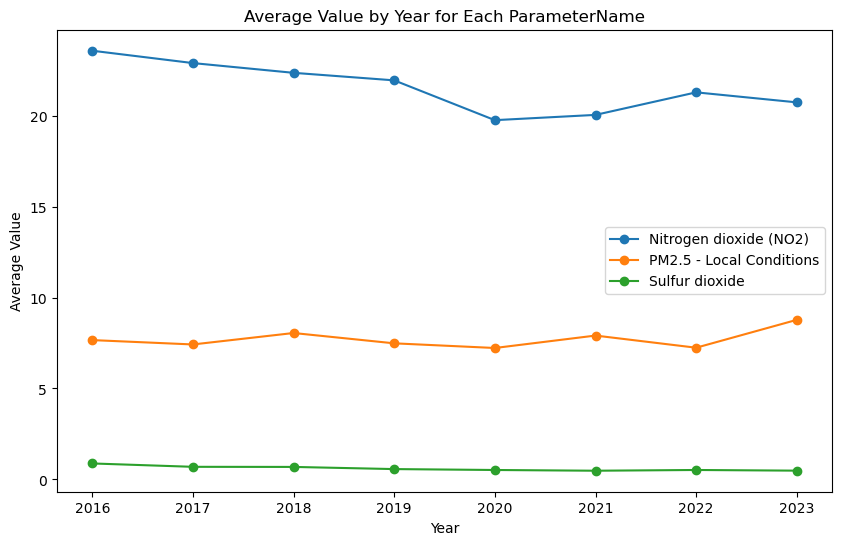

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = air_data.groupby(['Parameter Name', 'Year'])['Arithmetic Mean'].mean().reset_index()
plt.figure(figsize=(10, 6))

for name, group in grouped.groupby('Parameter Name'):
    
    plt.plot(group['Year'], group['Arithmetic Mean'], marker='o', linestyle='-', label=name)
plt.legend()
plt.title('Average Value by Year for Each ParameterName')
plt.xlabel('Year')
plt.ylabel('Average Value')

plt.show()


In [142]:
import pandas as pd


pivot_df = grouped.pivot(index='Parameter Name', columns='Year', values='Arithmetic Mean')

# Reset the index if you want 'Parameter Name' back as a column
pivot_df = pivot_df.reset_index()

# Now 'pivot_df' is structured with 'Parameter Name' as rows and each 'Year' as a separate column
pivot_df


Year,Parameter Name,2016,2017,2018,2019,2020,2021,2022,2023
0,Nitrogen dioxide (NO2),23.569506,22.890263,22.354367,21.940225,19.752054,20.041516,21.280915,20.730658
1,PM2.5 - Local Conditions,7.660326,7.420426,8.049644,7.482395,7.226096,7.909343,7.241418,8.773610
2,Sulfur dioxide,0.878199,0.693297,0.687531,0.568616,0.518669,0.478675,0.519409,0.482607


In [143]:
yearly_counts

Year
2010      3
2011     33
2012     10
2013      7
2014     29
2015     87
2016    129
2017    133
2018    166
2019    303
2020    486
2021    836
2022    839
2023    659
2024     72
Name: count, dtype: int64

In [144]:
import pandas as pd

all_data = pd.merge(grouped, yearly_counts, on='Year')


print(all_data)


              Parameter Name  Year  Arithmetic Mean  count
0     Nitrogen dioxide (NO2)  2016        23.569506    129
1   PM2.5 - Local Conditions  2016         7.660326    129
2             Sulfur dioxide  2016         0.878199    129
3     Nitrogen dioxide (NO2)  2017        22.890263    133
4   PM2.5 - Local Conditions  2017         7.420426    133
5             Sulfur dioxide  2017         0.693297    133
6     Nitrogen dioxide (NO2)  2018        22.354367    166
7   PM2.5 - Local Conditions  2018         8.049644    166
8             Sulfur dioxide  2018         0.687531    166
9     Nitrogen dioxide (NO2)  2019        21.940225    303
10  PM2.5 - Local Conditions  2019         7.482395    303
11            Sulfur dioxide  2019         0.568616    303
12    Nitrogen dioxide (NO2)  2020        19.752054    486
13  PM2.5 - Local Conditions  2020         7.226096    486
14            Sulfur dioxide  2020         0.518669    486
15    Nitrogen dioxide (NO2)  2021        20.041516    8

In [145]:
pivot_df = all_data.groupby(['Parameter Name', 'Year']).agg({'Arithmetic Mean': 'mean', 'count':'mean'}).reset_index()

# Reset the index if you want 'Parameter Name' back as a column
pivot_df = all_data.pivot_table(
    index='Parameter Name', 
    columns='Year', 
    values=['Arithmetic Mean', 'count'],
).reset_index()

# Now 'pivot_df' is structured with 'Parameter Name' as rows and each 'Year' as a separate column
pivot_df


Parameter Name Arithmetic Mean                        \
Year                                      2016       2017       2018   
0       Nitrogen dioxide (NO2)       23.569506  22.890263  22.354367   
1     PM2.5 - Local Conditions        7.660326   7.420426   8.049644   
2               Sulfur dioxide        0.878199   0.693297   0.687531   

                                                            count            \
Year       2019       2020       2021       2022       2023  2016 2017 2018   
0     21.940225  19.752054  20.041516  21.280915  20.730658   129  133  166   
1      7.482395   7.226096   7.909343   7.241418   8.773610   129  133  166   
2      0.568616   0.518669   0.478675   0.519409   0.482607   129  133  166   

                               
Year 2019 2020 2021 2022 2023  
0     303  486  836  839  659  
1     303  486  836  839  659  
2     303  486  836  839  659

HEAT MAP

In [147]:
data_type2 = data['TYPE OF CHARGER'] == 'Level 2 Charger'

In [148]:
data_type2 = data[data['TYPE OF CHARGER'] == 'Level 2 Charger']